In [34]:
import os

base_path = "dataset"

for kelas in os.listdir(base_path):
    kelas_path = os.path.join(base_path, kelas)
    if os.path.isdir(kelas_path):
        print(kelas, ":", len(os.listdir(kelas_path)), "gambar")

plastic : 891 gambar
organic : 967 gambar
paper : 853 gambar
metal : 1700 gambar
.ipynb_checkpoints : 0 gambar
glass : 1631 gambar
test_dir : 6 gambar
val_dir : 6 gambar
train_dir : 6 gambar


In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

train_dir = "dataset/train_dir"
val_dir   = "dataset/val_dir"
test_dir  = "dataset/test_dir"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

class_names = train_gen.class_indices
print("Label Kelas:", class_names)

Found 7070 images belonging to 6 classes.
Found 8139 images belonging to 6 classes.
Label Kelas: {'.ipynb_checkpoints': 0, 'glass': 1, 'metal': 2, 'organic': 3, 'paper': 4, 'plastic': 5}


In [36]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6, activation="softmax")  # Changed from 6 to 5 KELAS
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_7   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_14 (Dense)            (None, 128)               163968    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 6)                 774       
                                                                 
Total params: 2,422,726
Trainable params: 164,742
Non-

In [37]:
EPOCHS = 15

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

Epoch 1/15
221/221 [==============================] - 68s 299ms/step - loss: 0.5733 - accuracy: 0.7864 - val_loss: 0.3690 - val_accuracy: 0.8701
Epoch 2/15
221/221 [==============================] - 66s 292ms/step - loss: 0.3535 - accuracy: 0.8736 - val_loss: 0.3088 - val_accuracy: 0.8925
Epoch 3/15
221/221 [==============================] - 65s 293ms/step - loss: 0.3090 - accuracy: 0.8922 - val_loss: 0.2381 - val_accuracy: 0.9196
Epoch 4/15
221/221 [==============================] - 65s 293ms/step - loss: 0.2674 - accuracy: 0.9027 - val_loss: 0.2451 - val_accuracy: 0.9188
Epoch 5/15
221/221 [==============================] - 63s 285ms/step - loss: 0.2362 - accuracy: 0.9156 - val_loss: 0.2459 - val_accuracy: 0.9174
Epoch 6/15
221/221 [==============================] - 64s 288ms/step - loss: 0.2025 - accuracy: 0.9239 - val_loss: 0.1988 - val_accuracy: 0.9346
Epoch 7/15
221/221 [==============================] - 64s 291ms/step - loss: 0.1890 - accuracy: 0.9301 - val_loss: 0.2014 - val_ac

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224 # Define IMG_SIZE as it's used here
test_dir  = "dataset/test_dir" # Define test_dir as it's used here

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

loss, acc = model.evaluate(test_gen)
print("Akurasi Test:", acc)
model.save("trash_class_6.h5")

Found 6189 images belonging to 6 classes.
194/194 [==============================] - 10s 47ms/step - loss: 0.5746 - accuracy: 0.9166
Akurasi Test: 0.9166262745857239


In [11]:
model.save("trash_class_6.h5")


In [17]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open("trash_class_6.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Model TFLite berhasil dibuat")


INFO:tensorflow:Assets written to: /tmp/tmp0pxqd5hb/assets


INFO:tensorflow:Assets written to: /tmp/tmp0pxqd5hb/assets


✅ Model TFLite berhasil dibuat


2025-12-10 10:03:33.278762: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2025-12-10 10:03:33.278862: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2025-12-10 10:03:33.279060: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp0pxqd5hb
2025-12-10 10:03:33.311610: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2025-12-10 10:03:33.311694: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmp0pxqd5hb
2025-12-10 10:03:33.434354: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2025-12-10 10:03:33.866997: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmp0pxqd5hb
2025-12-10 10:03:34.019220: I tensorflow/cc/saved_model/loader.cc:305] SavedModel load for tags { serve }; Status: success: OK. Took 740158 

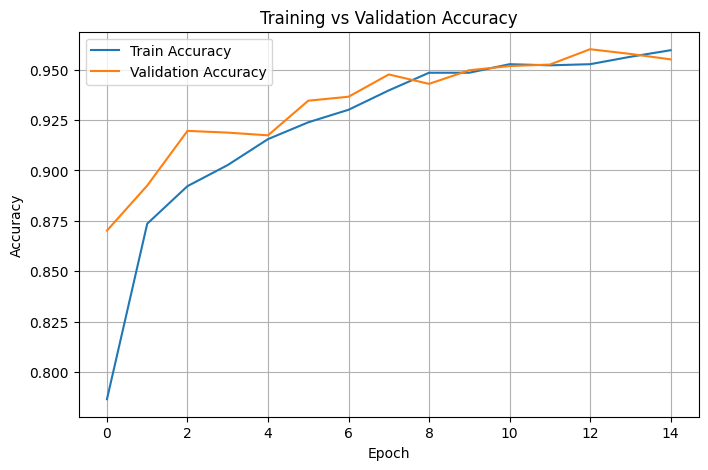

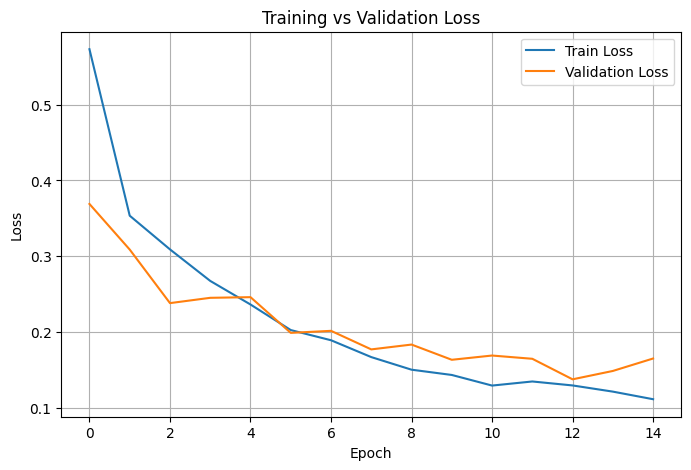

In [41]:
import matplotlib.pyplot as plt

# -----------------------------
# Plot Accuracy
# -----------------------------
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Plot Loss
# -----------------------------
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
